# Net IIP and the USD - Scatterplot
## Brian Dew, brianwdew@gmail.com

## Python Example
This example shows how Python can be used to gather and plot data on the Fed's broad index of the foreign exchange value of the dollar. The script gathers data from [Fred](https://research.stlouisfed.org/fred2/series/DTWEXM) and plots movements since 2014.

## Gathering data
First, we import pandas, numpy, and matplotlib and give them conventional short names. We will also use datetime and date.

In [94]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
#from datetime import date

Next, we use the pandas.io.data package to request the data from Fred. I've found the code for our series of interest, DTWEXM, by searching, but you can also find it on the Fred site by source (Board of Governors of the Federal Reserve System), or by release (H.10). We paste the series code into the datareader and provide start and end dates. Pandas retrieves the data into a dataframe.

In [95]:
import pandas_datareader.data as webdata
tstart = datetime.datetime(1973, 1, 1)
tend = datetime.datetime(2016, 1, 1)
frednames = "TWEXBMTH", "IIPUSNETIA"
#retrieve trade-weighted dollar data from fred
twd = webdata.DataReader(frednames, "fred", tstart, tend);

twd['TWQ'] = twd.TWEXBMTH.rolling(12,12).mean()
twd = twd.dropna()
twd = twd.rename(columns={'IIPUSNETIA': 'IIP'})
twd['TWQ'] = twd.TWQ.pct_change()
twd['IIP'] = twd.IIP.pct_change()
twd = twd[['IIP', 'TWQ']]

twd = twd.dropna()
#display five most recent observations
twd.tail(5)

,IIP,TWQ
DATE,,
2011-01-01,0.773636,-0.032635
2012-01-01,0.014117,-0.042683
2013-01-01,0.179202,0.025601
2014-01-01,0.317634,0.015678
2015-01-01,0.048020,0.036366


## Scatter plot of data
Lastly, we can use matplotlib to plot the data. The past week has seen this measure of oil prices reach nearly $40 per barrel. 

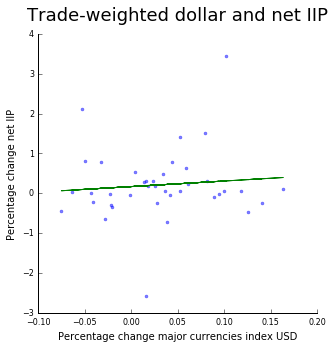

In [96]:
fig = plt.figure(figsize=[5,5])
ax1 = plt.subplot(111)

x = twd.TWQ
y = twd.IIP

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', alpha=0.5)
plt.plot(x, m*x + b, '-')

ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(labelsize=8)
#plt.title(figure_title, y=1.08)

#plt.scatter(twd.TWQ, twd.IIP, alpha=0.5)
ax1.set_ylabel('Percentage change net IIP')
ax1.set_xlabel('Percentage change major currencies index USD')
ax1.set_title('Trade-weighted dollar and net IIP', fontsize=18, y=1.03);


#Save as png
plt.savefig('jpustb.png', dpi=1000)